### Análise de Dados para Aquisição de Clínicas

#### **O que precisa ser feito?**
O objetivo é trazer as principais métricas relacionadas à aquisição de clínicas, realizando uma análise de dados exploratória com essas bases, de forma a identificar gargalos e oportunidades para otimizar a entrada de clinicas na Real.

#### Importando as Bibliotecas Python

In [1]:
# Importando as bibliotecas Python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from scipy.stats import skew, kurtosis
import eda_lib
from eda_lib import Eda_lib as Eda

In [2]:
import importlib
importlib.reload(eda_lib)

<module 'eda_lib' from 'd:\\repositorio\\datascience\\case\\aquisicao_clinicas\\aquisicao_clinicas\\eda_lib.py'>

In [3]:
# Permanently changes the pandas settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings('ignore')

# with pd.option_context('display.max_rows', None,
#                        'display.max_columns', None,
#                        'display.precision', 3,
#                        ):

#### Obtendo os dados

* Nossos dados serão obtidos atráves de três arquivos .csv, são eles:
    * clinics.csv
    * activity.csv
    * subscription.csv

#### Tratamento de dados

* #### Dataset Clinics
    * A tabela `clinics` contém informações sobre as clínicas cadastradas e alguns marcos temporais delas, como trial e credenciamento.

In [4]:
# Lendo o arquivo os arquivos e criando nossos datasets.
df_clinics = pd.read_csv(r'..\dados\clinics.csv')
df_clinics.head()

,CLINIC_ID,CLINIC_CREATED_AT,BUSINESS_SEGMENTATION,IS_CHAIN_CLINIC,FIRST_USER_HUBSPOT_SOURCE,INTEREST_REASONS,INTEREST_CATEGORY_SIGNUP,HAS_INTEREST_BNPL,HAS_INTEREST_BNPL_ONLY,HAS_INTEREST_SAAS,TRIAL_DURATION,TRIAL_START_DATE,TRIAL_END_DATE,TRIAL_START_HOUR,TRIAL_START_HOUR_CATEGORY,TRIAL_START_DAY_OF_WEEK,TRIAL_START_DAY_OF_WEEK_CATEGORY,HAS_USER_CREATED,MARKETING_ATTRIBUITION,MARKETING_ATTRIBUITION_CHANNEL_GROUP,MARKETING_ATTRIBUITION_CAMPAIGN,MARKETING_ATTRIBUITION_CAMPAIGN_PRODUCT,MARKETING_ATTRIBUITION_AD_GROUP,IS_PAID_MEDIUM,HAS_ASKED_FOR_ACCREDITATION,HAS_STARTED_ACCREDITATION_AND_NOT_FINISHED,IS_ACCREDITATION_APPROVED,IS_ACCREDITATION_REPROVED,CLINIC_ACCREDITATION_STATUS,REQUEST_FINISHED_AT,ACCREDITATION_REQUESTED_AT,ACCREDITATION_APPROVED_AT,ACCREDITATION_REJECTED_AT
0,8993,2023-08-01 06:25:16.121,Independente,False,Inbound,"[""bnpl"", ""finance_management"", ""patients_management"", ""calendar""]",BNPL e SaaS,True,False,True,7,2023-08-01,2023-08-08,6,After Hours,2,Weekday,True,Paid - meta,Paid - meta,meta_fce_bnpl,BNPL,interesses-validados,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN
1,8994,2023-08-01 06:58:36.251,Independente,False,Inbound,"[""finance_management"", ""patients_management"", ""calendar"", ""bnpl""]",BNPL e SaaS,True,False,True,7,2023-08-01,2023-08-08,6,After Hours,2,Weekday,True,Paid - meta,Paid - meta,meta_signup_agenda,SaaS,interesses-validados,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN
2,8995,2023-08-01 06:59:23.156,Independente,False,Inbound,"[""bnpl""]",Apenas BNPL,True,True,False,7,2023-08-01,2023-08-08,6,After Hours,2,Weekday,True,Paid - meta,Paid - meta,meta_fce_bnpl,BNPL,interesses-validados,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN
3,8996,2023-08-01 08:03:38.557,Independente,False,Inbound,"[""calendar"", ""bnpl"", ""patients_management"", ""finance_management""]",BNPL e SaaS,True,False,True,7,2023-08-01,2023-08-08,8,After Hours,2,Weekday,True,Paid - meta,Paid - meta,meta_signup_agenda,SaaS,interesses-validados,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN
4,8997,2023-08-01 08:34:33.894,Independente,False,Inbound,"[""patients_management""]",Apenas SaaS,False,False,True,7,2023-08-01,2023-08-08,8,After Hours,2,Weekday,True,Paid - meta,Paid - meta,meta_signup_bnpl_Antiga,SaaS,NaN,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN


In [5]:
# Instanciando a classe Eda_lib
eda_clinics = Eda(dataframe=df_clinics, nome='df_clinics', colormap='mako_r')

In [6]:
# Exibe o número de registros e colunas do dataset.
print(eda_clinics)

O dataset df_clinics possui 2219 registros e 33 colunas.
------------------------------------------------------------------------
CLINIC_ID                                      int64
CLINIC_CREATED_AT                             object
BUSINESS_SEGMENTATION                         object
IS_CHAIN_CLINIC                                 bool
FIRST_USER_HUBSPOT_SOURCE                     object
INTEREST_REASONS                              object
INTEREST_CATEGORY_SIGNUP                      object
HAS_INTEREST_BNPL                               bool
HAS_INTEREST_BNPL_ONLY                          bool
HAS_INTEREST_SAAS                               bool
TRIAL_DURATION                                 int64
TRIAL_START_DATE                              object
TRIAL_END_DATE                                object
TRIAL_START_HOUR                               int64
TRIAL_START_HOUR_CATEGORY                     object
TRIAL_START_DAY_OF_WEEK                        int64
TRIAL_START_DAY_OF_WEE

In [7]:
clinics_datetime = ['CLINIC_CREATED_AT','TRIAL_START_DATE','TRIAL_END_DATE','REQUEST_FINISHED_AT','ACCREDITATION_REQUESTED_AT'
                    ,'ACCREDITATION_APPROVED_AT','ACCREDITATION_REJECTED_AT']

In [8]:
# Colunas com informações de data, porém o tipo de dado dessas colunas estão como object.
print(clinics_datetime)

['CLINIC_CREATED_AT', 'TRIAL_START_DATE', 'TRIAL_END_DATE', 'REQUEST_FINISHED_AT', 'ACCREDITATION_REQUESTED_AT', 'ACCREDITATION_APPROVED_AT', 'ACCREDITATION_REJECTED_AT']


In [9]:
# Convertendo as colunas do tipo object com informação de data para o formato datetime.
eda_clinics.to_datetime(clinics_datetime)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CLINIC_CREATED_AT           2219 non-null   datetime64[ns]
 1   TRIAL_START_DATE            2219 non-null   datetime64[ns]
 2   TRIAL_END_DATE              2219 non-null   datetime64[ns]
 3   REQUEST_FINISHED_AT         688 non-null    datetime64[ns]
 4   ACCREDITATION_REQUESTED_AT  688 non-null    datetime64[ns]
 5   ACCREDITATION_APPROVED_AT   536 non-null    datetime64[ns]
 6   ACCREDITATION_REJECTED_AT   175 non-null    datetime64[ns]
dtypes: datetime64[ns](7)
memory usage: 121.5 KB
None


In [10]:
# Verifica os valores ausentes.
eda_clinics.valores_ausentes()

,valores ausentes,porcentagem
INTEREST_REASONS,153.000000,6.894998
MARKETING_ATTRIBUITION_CAMPAIGN,744.000000,33.528616
MARKETING_ATTRIBUITION_CAMPAIGN_PRODUCT,751.000000,33.844074
CLINIC_ACCREDITATION_STATUS,1261.000000,56.827400
REQUEST_FINISHED_AT,1531.000000,68.995043
ACCREDITATION_REQUESTED_AT,1531.000000,68.995043
ACCREDITATION_APPROVED_AT,1683.000000,75.844975
MARKETING_ATTRIBUITION_AD_GROUP,1888.000000,85.083371
ACCREDITATION_REJECTED_AT,2044.000000,92.113565


Podemos verificar que as colunas com maiores percentuais de valores nulos são ligadas ao processo de credenciamento da clínica, portanto esses valores podem representar a não adesão ao plano.
Inicialmente iremos adotar essa premissa, sendo que para a coluna `CLINIC_ACCREDITATION_STATUS` iremos substituir os valores nulos com **Não aderiu ao plano**.

In [11]:
df_clinics['CLINIC_ACCREDITATION_STATUS'].value_counts()

CLINIC_ACCREDITATION_STATUS
Concluído                             521
Incompleta                            270
Reprovado                             151
Concluído - faltam dados bancários     15
Com pendência (fase 2)                  1
Name: count, dtype: int64

In [12]:
# Substitui os valores nulos da coluna CLINIC_ACCREDITATION_STATUS por 'Não aderiu ao plano'
df_clinics['CLINIC_ACCREDITATION_STATUS'] = np.where(df_clinics['CLINIC_ACCREDITATION_STATUS'].isna(), 'Não aderiu ao plano', df_clinics['CLINIC_ACCREDITATION_STATUS'])

In [13]:
df_clinics['CLINIC_ACCREDITATION_STATUS'].value_counts()

CLINIC_ACCREDITATION_STATUS
Não aderiu ao plano                   1261
Concluído                              521
Incompleta                             270
Reprovado                              151
Concluído - faltam dados bancários      15
Com pendência (fase 2)                   1
Name: count, dtype: int64

Para a coluna `INTEREST_REASONS`, vamos substituir os valores nulos e `[]` por **Não informado**.

In [14]:
df_clinics['INTEREST_REASONS'].value_counts()

INTEREST_REASONS
["bnpl"]                                                             881
["bnpl", "calendar", "patients_management", "finance_management"]    178
["finance_management"]                                               125
["patients_management"]                                              120
["calendar"]                                                          92
["bnpl", "finance_management"]                                        43
["patients_management", "finance_management", "calendar", "bnpl"]     33
["calendar", "bnpl", "patients_management", "finance_management"]     29
["finance_management", "patients_management", "calendar", "bnpl"]     28
["patients_management", "finance_management", "calendar"]             27
["bnpl", "patients_management", "finance_management", "calendar"]     25
["calendar", "patients_management", "finance_management", "bnpl"]     25
["calendar", "patients_management", "finance_management"]             25
["patients_management", "finance_m

In [15]:
df_clinics['INTEREST_REASONS'].fillna('Não informado', inplace=True)

In [16]:
df_clinics['INTEREST_REASONS'].replace('[]','Não informado', inplace=True)

In [17]:
df_clinics['INTEREST_REASONS'].value_counts()

INTEREST_REASONS
["bnpl"]                                                             881
["bnpl", "calendar", "patients_management", "finance_management"]    178
Não informado                                                        154
["finance_management"]                                               125
["patients_management"]                                              120
["calendar"]                                                          92
["bnpl", "finance_management"]                                        43
["patients_management", "finance_management", "calendar", "bnpl"]     33
["calendar", "bnpl", "patients_management", "finance_management"]     29
["finance_management", "patients_management", "calendar", "bnpl"]     28
["patients_management", "finance_management", "calendar"]             27
["calendar", "patients_management", "finance_management"]             25
["calendar", "patients_management", "finance_management", "bnpl"]     25
["bnpl", "patients_management", "f

Vamos atualizar a variável `TRIAL_DURATION` para que, se houver algum erro, o mesmo seja corrigido. Para isso utilizaremos (`TRIAL_END_DATE` - `TRIAL_START_DATE`).

In [18]:
# Atualizando a variável TRIAL_DURATION
df_clinics['TRIAL_DURATION'] = (df_clinics['TRIAL_END_DATE'] - df_clinics['TRIAL_START_DATE']).dt.days

* #### Dataset Subscriptions
    * A tabela `subscriptions` contém informações de assinaturas de clínicas. Se uma clínica começar uma assinatura, encerrar ela e depois voltar a ser assinante, ela terá múltiplas linhas de assinatura.

In [19]:
# Lendo o arquivo os arquivos e criando nossos datasets.
df_subscriptions= pd.read_csv(r'..\dados\subscriptions.csv')
df_subscriptions.head()

,CLINIC_ID,STRIPE_SUBSCRIPTION_ID,SUBSCRIPTION_START_DATE,SUBSCRIPTION_END_DATE,SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT,SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT,MOST_RECENT_INVOICE_CREATED_AT,LAST_PAYMENT_AT,CHECKOUT_STATUS,SUBSCRIPTION_STATUS,BILLING_INTERVAL_IN_MONTHS,FIRST_PAYMENT_METHOD_TYPE,FIRST_CARD_BRAND,FIRST_PAYMENT_AMOUNT,FIRST_PAYMENT_AMOUNT_OFF,FIRST_PAYMENT_PROMOTION_CODE,FIRST_PAYMENT_COUPON_ID,FIRST_PAYMENT_AMOUNT_OFF_2
0,9000,sub_1NaOxzCpjOdJI4gTfqZ2epGB,2023-08-01,2023-10-01,2023-09-01 17:14:51.000,2023-10-01 17:14:51.000,2023-09-01 17:16:49.000,2023-09-01 18:17:14.000,complete,canceled,1.0,Cartão de Crédito,mastercard,89.9,NaN,NaN,NaN,NaN
1,9032,sub_1Namy7CpjOdJI4gTzrxPLlFg,2023-08-02,NaN,2023-10-02 18:52:35.000,2023-11-02 18:52:35.000,2023-10-02 18:53:31.000,2023-08-09 10:20:45.000,complete,past_due,1.0,Cartão de Crédito,visa,89.9,NaN,NaN,NaN,NaN
2,9105,sub_1NalRdCpjOdJI4gTFRPqMhcv,2023-08-02,NaN,2023-10-02 17:14:57.000,2023-11-02 17:14:57.000,2023-10-02 17:16:56.000,2023-10-02 18:22:04.000,complete,active,1.0,Cartão de Crédito,visa,89.9,NaN,NaN,NaN,NaN
3,9027,sub_1Nb3CECpjOdJI4gTFLOepcZD,2023-08-03,2023-09-03,2023-08-03 12:12:14.000,2023-09-03 12:12:14.000,2023-08-03 12:12:14.000,2023-08-03 12:12:16.000,complete,canceled,1.0,Cartão de Crédito,visa,89.9,NaN,NaN,NaN,NaN
4,9072,sub_1Nb7E2CpjOdJI4gTsIJIy9b1,2023-08-03,2023-09-03,2023-08-03 16:30:22.000,2023-09-03 16:30:22.000,2023-08-03 16:30:22.000,2023-08-03 16:30:24.000,complete,canceled,1.0,Cartão de Crédito,visa,89.9,NaN,NaN,NaN,NaN


In [20]:
# Instanciando a classe Eda_lib
eda_subscriptions = Eda(dataframe=df_subscriptions, nome='df_subscriptions', colormap='mako_r')

In [21]:
print(eda_subscriptions)

O dataset df_subscriptions possui 385 registros e 18 colunas.
------------------------------------------------------------------------
CLINIC_ID                                   int64
STRIPE_SUBSCRIPTION_ID                     object
SUBSCRIPTION_START_DATE                    object
SUBSCRIPTION_END_DATE                      object
SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT     object
SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT        object
MOST_RECENT_INVOICE_CREATED_AT             object
LAST_PAYMENT_AT                            object
CHECKOUT_STATUS                            object
SUBSCRIPTION_STATUS                        object
BILLING_INTERVAL_IN_MONTHS                float64
FIRST_PAYMENT_METHOD_TYPE                  object
FIRST_CARD_BRAND                           object
FIRST_PAYMENT_AMOUNT                      float64
FIRST_PAYMENT_AMOUNT_OFF                  float64
FIRST_PAYMENT_PROMOTION_CODE               object
FIRST_PAYMENT_COUPON_ID                    object
FIRST_PAYMENT_A

In [22]:
subscriptions_datetime = ['SUBSCRIPTION_START_DATE','SUBSCRIPTION_END_DATE','SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT','SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT'
                          ,'MOST_RECENT_INVOICE_CREATED_AT','LAST_PAYMENT_AT']

In [23]:
# Colunas com informações de data, porém o tipo de dado dessas colunas estão como object.
print(subscriptions_datetime)

['SUBSCRIPTION_START_DATE', 'SUBSCRIPTION_END_DATE', 'SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT', 'SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT', 'MOST_RECENT_INVOICE_CREATED_AT', 'LAST_PAYMENT_AT']


In [24]:
# Convertendo as colunas do tipo object com informação de data para o formato datetime.
eda_subscriptions.to_datetime(subscriptions_datetime)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   SUBSCRIPTION_START_DATE                 384 non-null    datetime64[ns]
 1   SUBSCRIPTION_END_DATE                   46 non-null     datetime64[ns]
 2   SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT  385 non-null    datetime64[ns]
 3   SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT     385 non-null    datetime64[ns]
 4   MOST_RECENT_INVOICE_CREATED_AT          385 non-null    datetime64[ns]
 5   LAST_PAYMENT_AT                         371 non-null    datetime64[ns]
dtypes: datetime64[ns](6)
memory usage: 18.2 KB
None


In [25]:
# Verifica valores ausentes.
eda_subscriptions.valores_ausentes()

,valores ausentes,porcentagem
SUBSCRIPTION_START_DATE,1.000000,0.259740
FIRST_PAYMENT_AMOUNT,1.000000,0.259740
FIRST_PAYMENT_METHOD_TYPE,1.000000,0.259740
BILLING_INTERVAL_IN_MONTHS,1.000000,0.259740
CHECKOUT_STATUS,2.000000,0.519481
SUBSCRIPTION_STATUS,2.000000,0.519481
LAST_PAYMENT_AT,14.000000,3.636364
FIRST_CARD_BRAND,72.000000,18.701299
FIRST_PAYMENT_COUPON_ID,312.000000,81.038961
FIRST_PAYMENT_PROMOTION_CODE,317.000000,82.337662


Algumas variáveis apresentaram um grande número de valores ausentes (`acima de 80%`):
* Este grupo de variáveis indicam a utilização de cupons e descontos para o primeiro pagamento das assinaturas. Provavelmente os mesmos foram pouco ou não utilizados.
    * FIRST_PAYMENT_COUPON_ID
    * FIRST_PAYMENT_PROMOTION_CODE
    * FIRST_PAYMENT_AMOUNT_OFF
    * FIRST_PAYMENT_AMOUNT_OFF_2

* SUBSCRIPTION_END_DATE: Indica a data de encerramento da assinatura. Isso mostra que a grande maioria das assinaturas estavam ativas durante o período de coleta de dados.

* Este grupo de variáveis apresentaram um baixo número de valores nulos (`menor que 1%`), isso pode ser devido a dados ainda não consolidados durante o período de coleta ou por algum erro na entrada de dados.
    * SUBSCRIPTION_START_DATE
    * FIRST_PAYMENT_AMOUNT
    * FIRST_PAYMENT_METHOD_TYPE
    * BILLING_INTERVAL_IN_MONTHS
    * CHECKOUT_STATUS
    * SUBSCRIPTION_STATUS

* FIRST_CARD_BRAND: Bandeira do cartão utilizado no primeiro pagamento. Os valores nulos podem indicar que não foi utilizado o cartão de crédito como meio de pagamento.

* LAST_PAYMENT_AT: Data do ultimo pagamento realizado. Os valores nulos podem indicar que ainda não houve o pagamento ou pode ser algum erro durante a entrada de dados.


In [26]:
df_subscriptions.loc[df_subscriptions['SUBSCRIPTION_START_DATE'].isna()]

,CLINIC_ID,STRIPE_SUBSCRIPTION_ID,SUBSCRIPTION_START_DATE,SUBSCRIPTION_END_DATE,SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT,SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT,MOST_RECENT_INVOICE_CREATED_AT,LAST_PAYMENT_AT,CHECKOUT_STATUS,SUBSCRIPTION_STATUS,BILLING_INTERVAL_IN_MONTHS,FIRST_PAYMENT_METHOD_TYPE,FIRST_CARD_BRAND,FIRST_PAYMENT_AMOUNT,FIRST_PAYMENT_AMOUNT_OFF,FIRST_PAYMENT_PROMOTION_CODE,FIRST_PAYMENT_COUPON_ID,FIRST_PAYMENT_AMOUNT_OFF_2
384,10979,sub_1O2fHvCpjOdJI4gTrnDDw6J3,NaT,NaT,2023-10-18 16:20:15,2024-10-18 16:20:15,2023-10-18 16:20:15,NaT,complete,incomplete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Apagando os registros que não contenham a data de início da assinatura (SUBSCRIPTION_START_DATE).
df_subscriptions.dropna(subset=['SUBSCRIPTION_START_DATE'], inplace=True)

In [30]:
eda_subscriptions.valores_ausentes()

,valores ausentes,porcentagem
CHECKOUT_STATUS,2.000000,0.520833
SUBSCRIPTION_STATUS,2.000000,0.520833
LAST_PAYMENT_AT,13.000000,3.385417
FIRST_CARD_BRAND,71.000000,18.489583
FIRST_PAYMENT_COUPON_ID,311.000000,80.989583
FIRST_PAYMENT_PROMOTION_CODE,316.000000,82.291667
SUBSCRIPTION_END_DATE,338.000000,88.020833
FIRST_PAYMENT_AMOUNT_OFF,384.000000,100.000000
FIRST_PAYMENT_AMOUNT_OFF_2,384.000000,100.000000


* #### Dataset Activity 
    * A tabela activity registra todas as atividades realizadas pela clínica, contendo registros temporais de quando a clínica desempenhou uma determinada ação. Esta extração contém apenas atividades realizadas em período de trial.

In [31]:
# Lendo o arquivo os arquivos e criando nossos datasets.
df_activity = pd.read_csv(r'..\dados\activity.csv')
df_activity.head()

,CLINIC_ID,ACTIVITY_AT,ACTIVITY_TYPE,FEATURE,MODULE,ANALYTICS_DOMAIN,IS_TRANSACTION,IS_BNPL_ACTIVITY,IS_VALID_ACTIVITY,IS_DELETION_ACTIVITY,IS_MANAGEMENT_ACTIVITY,IS_FINANCE_ACTIVITY
0,9825,2023-08-24 18:46:47.733,patient_discarded,patient_management,patient,patient,False,False,True,True,True,False
1,9984,2023-08-24 19:41:43.497,patient_created,patient_management,patient,patient,False,False,False,False,True,False
2,9984,2023-08-24 19:41:44.037,time_slot_created,scheduling,schedule,scheduling,False,False,True,False,True,False
3,9984,2023-08-24 19:51:20.451,patient_created,patient_management,patient,patient,False,False,False,False,True,False
4,9984,2023-08-24 19:51:46.663,time_slot_created,scheduling,schedule,scheduling,False,False,True,False,True,False


In [32]:
eda_activity = Eda(dataframe=df_activity, nome='df_activity', colormap='mako_r')

In [33]:
print(eda_activity)

O dataset df_activity possui 13941 registros e 12 colunas.
------------------------------------------------------------------------
CLINIC_ID                  int64
ACTIVITY_AT               object
ACTIVITY_TYPE             object
FEATURE                   object
MODULE                    object
ANALYTICS_DOMAIN          object
IS_TRANSACTION              bool
IS_BNPL_ACTIVITY            bool
IS_VALID_ACTIVITY           bool
IS_DELETION_ACTIVITY        bool
IS_MANAGEMENT_ACTIVITY      bool
IS_FINANCE_ACTIVITY         bool


In [34]:
activity_datetime = ['ACTIVITY_AT']

In [35]:
# Colunas com informações de data, porém o tipo de dado dessas colunas estão como object.
print(activity_datetime)

['ACTIVITY_AT']


In [36]:
# Convertendo as colunas do tipo object com informação de data para o formato datetime.
eda_activity.to_datetime(activity_datetime)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13941 entries, 0 to 13940
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ACTIVITY_AT  13941 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 109.0 KB
None


In [37]:
# Verifica valores ausentes.
eda_activity.valores_ausentes()

,valores ausentes,porcentagem


Como podemos observar, esse dataset não possui valores ausentes.

#### Análise Exploratória (EDA) Univariada

* #### Dataset Clinics

In [38]:
df_clinics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 33 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   CLINIC_ID                                   2219 non-null   int64         
 1   CLINIC_CREATED_AT                           2219 non-null   datetime64[ns]
 2   BUSINESS_SEGMENTATION                       2219 non-null   object        
 3   IS_CHAIN_CLINIC                             2219 non-null   bool          
 4   FIRST_USER_HUBSPOT_SOURCE                   2219 non-null   object        
 5   INTEREST_REASONS                            2219 non-null   object        
 6   INTEREST_CATEGORY_SIGNUP                    2219 non-null   object        
 7   HAS_INTEREST_BNPL                           2219 non-null   bool          
 8   HAS_INTEREST_BNPL_ONLY                      2219 non-null   bool          
 9   HAS_INTE

* Coluna `CLINIC_CREATED_AT`: Data em que a clínica foi cadastrada no sistema.

In [39]:
data_criacao_count = df_clinics['CLINIC_CREATED_AT'].dt.date.value_counts().sort_index()

Text(0.5, 1.0, 'Frequência diária de cadastros das clínicas')

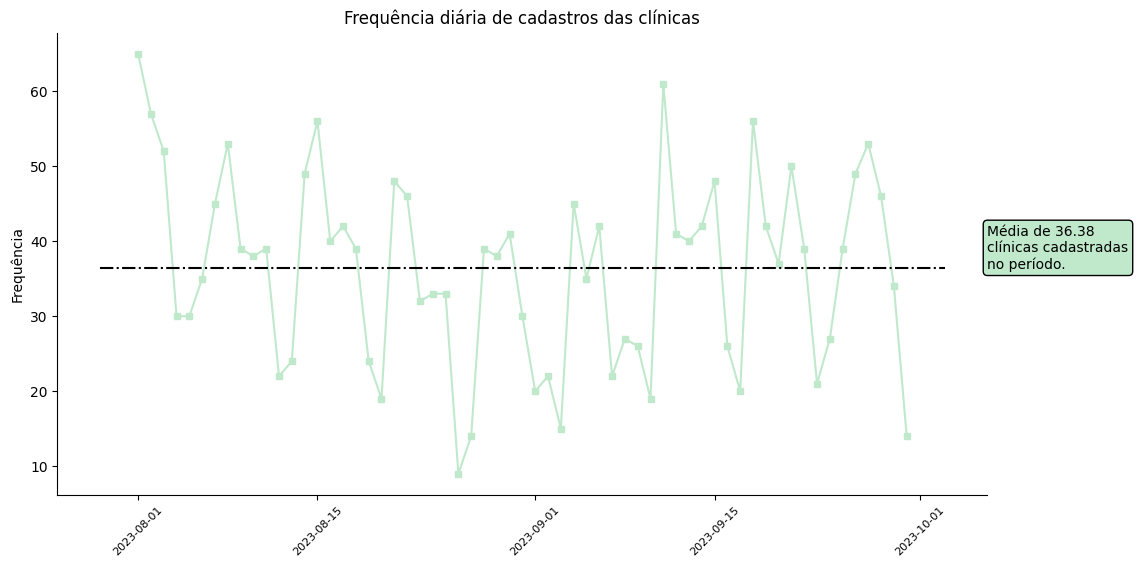

In [42]:
plt.figure(figsize=(12,6))
ax = data_criacao_count.plot(kind='line', color=eda_clinics.palette, marker='s', markersize=5)
plt.hlines(y=data_criacao_count.mean(),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='black', linestyles='dashdot')
plt.text(x=ax.get_xlim()[1], y=data_criacao_count.mean(), s=f'Média de {data_criacao_count.mean():.2f}' + '\n' + 'clínicas cadastradas' + '\n' + 'no período.', color='black', fontweight='light', bbox=dict(boxstyle='round'))
sns.despine()
plt.ylabel('Frequência')
plt.xlabel('')
plt.xticks(rotation=45, fontsize=8)
plt.title('Frequência diária de cadastros das clínicas')

In [43]:
top_dia_semana = df_clinics['CLINIC_CREATED_AT'].dt.day_name().value_counts()
top_dia_semana

CLINIC_CREATED_AT
Tuesday      425
Monday       382
Wednesday    381
Thursday     355
Friday       309
Saturday     194
Sunday       173
Name: count, dtype: int64

Text(0.5, 1.0, 'Frequência dos períodos de cadastros das clínicas')

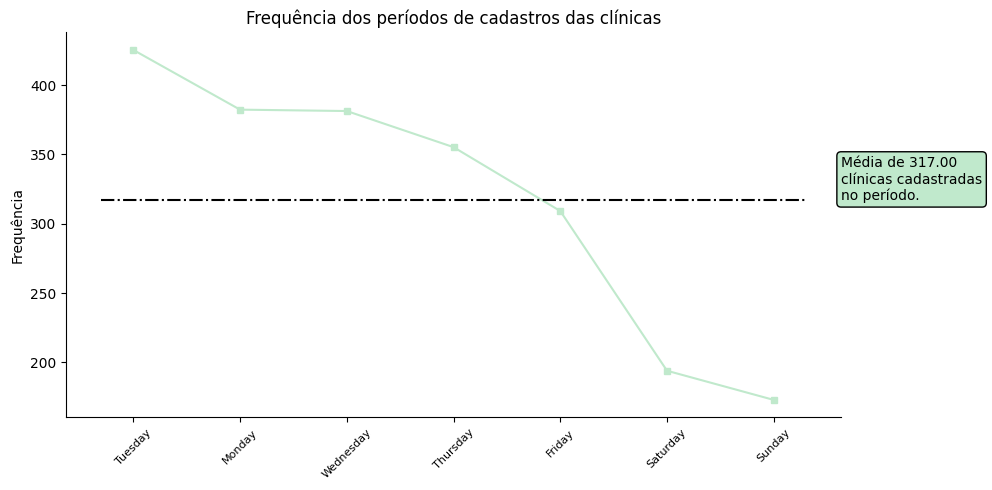

In [44]:
plt.figure(figsize=(10,5))
ax = top_dia_semana.plot(kind='line', color=eda_clinics.palette, marker='s', markersize=5)
plt.hlines(y=top_dia_semana.mean(),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='black', linestyles='dashdot')
plt.text(x=ax.get_xlim()[1], y=top_dia_semana.mean(), s=f'Média de {top_dia_semana.mean():.2f}' + '\n' + 'clínicas cadastradas' + '\n' + 'no período.', color='black', fontweight='light', bbox=dict(boxstyle='round'))
sns.despine()
plt.ylabel('Frequência')
plt.xlabel('')
plt.xticks(rotation=45, fontsize=8)
plt.title('Frequência dos períodos de cadastros das clínicas')

> Podemos observar uma grande variação no volume (número de cadastros) durante o périodo analisado (entre Agosto e Setembro de 2023), apresentando alguns picos, como também alguns momentos de declínio acentuado.

> Os dias da semana que registraram os maiores números de cadastros foram entre segunda-feira e quarta-feira, enquanto os que registraram os menores números, estavam entre sábado e domingo.

* Coluna `BUSINESS_SEGMENTATION`: Segmentação de negócio ao qual a clínica pertence.

In [45]:
business_segmentation = eda_clinics.frequencia_cat('BUSINESS_SEGMENTATION')
business_segmentation

,BUSINESS_SEGMENTATION,frequencia,porcentagem
2,Independente - Legado,21,0.946372
1,Rede Homologada,143,6.444344
0,Independente,2055,92.609283


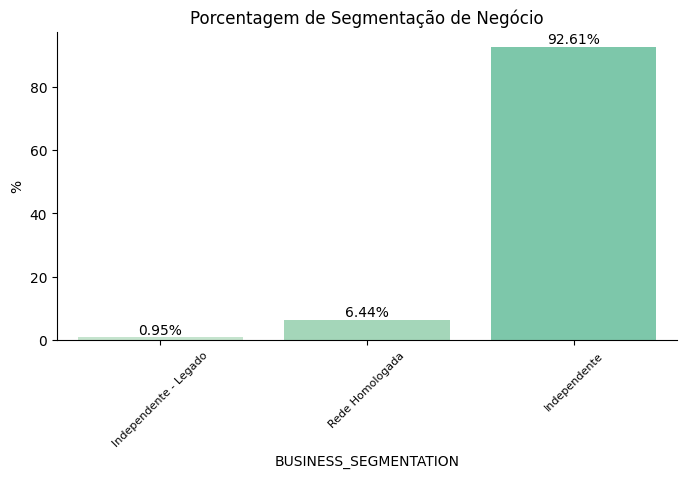

In [46]:
eda_clinics.plot_frequencia_cat(coluna='BUSINESS_SEGMENTATION', title='Porcentagem de Segmentação de Negócio')

> A grande maioria das clínicas são independentes e são com elas que realizaremos nossas análises.

* Variável `IS_CHAIN_CLINIC`: Indica se a clínica faz parte de uma grande rede ou franquia.

In [47]:
is_chain_clinic = eda_clinics.frequencia_cat('IS_CHAIN_CLINIC')
is_chain_clinic

,IS_CHAIN_CLINIC,frequencia,porcentagem
1,True,143,6.444344
0,False,2076,93.555656


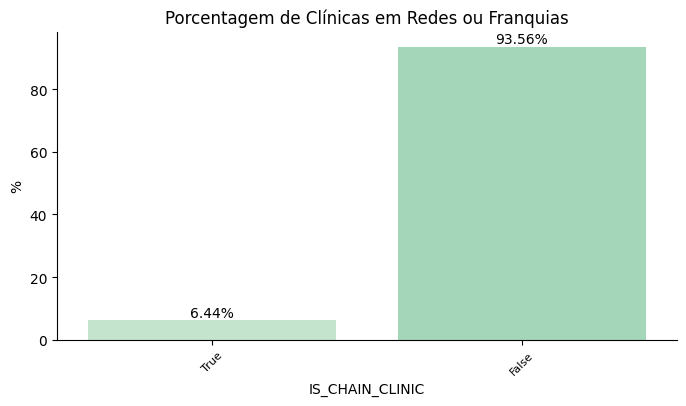

In [48]:
eda_clinics.plot_frequencia_cat('IS_CHAIN_CLINIC',  title='Porcentagem de Clínicas em Redes ou Franquias' )

> Esta variável esta totalmente ligada a `BUSINESS_SEGMENTATION`, confirmando que quase a totalidade (93,55%) da clínicas são independentes.

* Variável `FIRST_USER_HUBSPOT_SOURCE`: Fonte inicial pela qual o usuário descobriu ou foi adquirido pela clínica (por exemplo, publicidade, referência, etc.).

In [49]:
first_hubspot = eda_clinics.frequencia_cat(coluna='FIRST_USER_HUBSPOT_SOURCE')
first_hubspot

,FIRST_USER_HUBSPOT_SOURCE,frequencia,porcentagem
4,Eventos,1,0.045065
3,Outbound,3,0.135196
2,no_user,18,0.811176
1,Redes,297,13.384407
0,Inbound,1900,85.624155


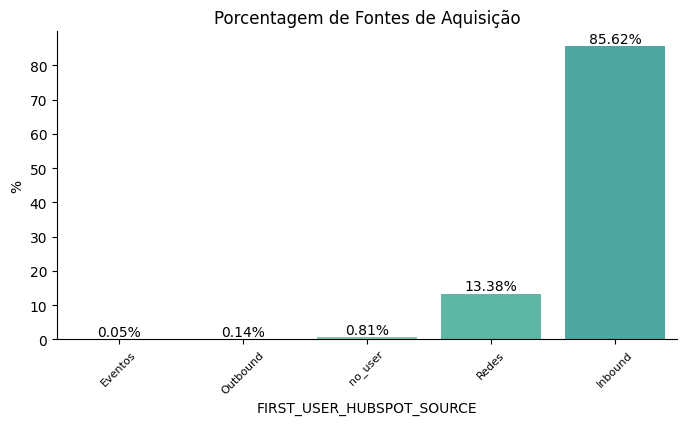

In [50]:
eda_clinics.plot_frequencia_cat(coluna='FIRST_USER_HUBSPOT_SOURCE', title='Porcentagem de Fontes de Aquisição')

> As categorias de fontes de aquisição mostram um grande desbalanceamento na sua distribuição, sendo a `inbound` a predominante com quase 86%, mostrando que a estratégia não-invasiva, ou seja, onde os clientes vão até a empresa, não a empresa que vai até os clientes, é a que tem melhor resultado.

* Variável INTEREST_REASONS: Razões de interesse expressas pela clínica.

Vamos realizar alguns tratamentos nos valores dessa coluna, antes de realizarmos as análises.

In [51]:
df_clinics['INTEREST_REASONS'].head()

0    ["bnpl", "finance_management", "patients_management", "calendar"]
1    ["finance_management", "patients_management", "calendar", "bnpl"]
2                                                             ["bnpl"]
3    ["calendar", "bnpl", "patients_management", "finance_management"]
4                                              ["patients_management"]
Name: INTEREST_REASONS, dtype: object

In [52]:
import re

def sub(valor: str) -> str:
    return re.sub(r"[\[\]\"']", "", valor).split(', ')


df_interesses = pd.DataFrame([item for lista in df_clinics['INTEREST_REASONS'].apply(sub) for item in lista], columns=['INTEREST_REASONS'])
df_interesses.attrs['name'] = 'df_interesses'
df_interesses.head()


,INTEREST_REASONS
0,bnpl
1,finance_management
2,patients_management
3,calendar
4,finance_management


In [53]:
eda_interesses = Eda(df_interesses, 'df_interesses', colormap='mako_r')

In [54]:
eda_interesses.frequencia_cat(coluna='INTEREST_REASONS')

,INTEREST_REASONS,frequencia,porcentagem
4,Não informado,154,3.634647
3,calendar,787,18.574463
2,finance_management,871,20.556998
1,patients_management,879,20.745811
0,bnpl,1546,36.488081


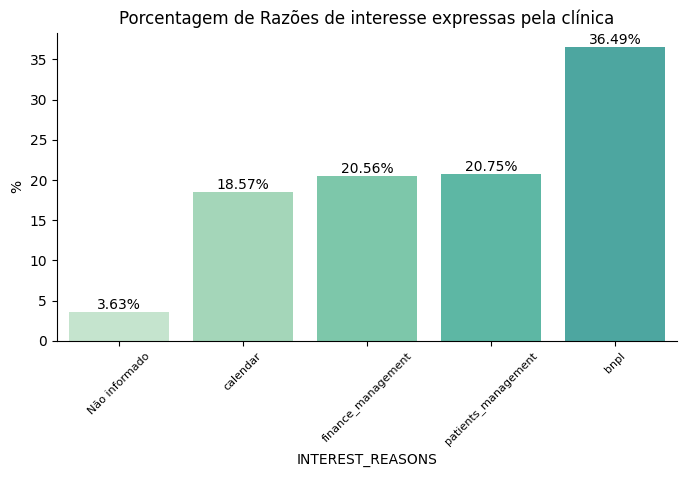

In [55]:
eda_interesses.plot_frequencia_cat(coluna='INTEREST_REASONS', title='Porcentagem de Razões de interesse expressas pela clínica')

> A grande maioria das clínicas, cerca de 36,50%, tem interesse inicial somente no serviço de BNPL (**Buy now, pay later**), seguido pelo interesse no gerenciamento de pacientes.

* Variável INTEREST_CATEGORY_SIGNUP: Categoria de interesse desejada.

In [56]:
eda_clinics.frequencia_cat(coluna='INTEREST_CATEGORY_SIGNUP')

,INTEREST_CATEGORY_SIGNUP,frequencia,porcentagem
3,Desconhecido,154,6.940063
2,Apenas SaaS,519,23.388914
1,BNPL e SaaS,665,29.968454
0,Apenas BNPL,881,39.702569


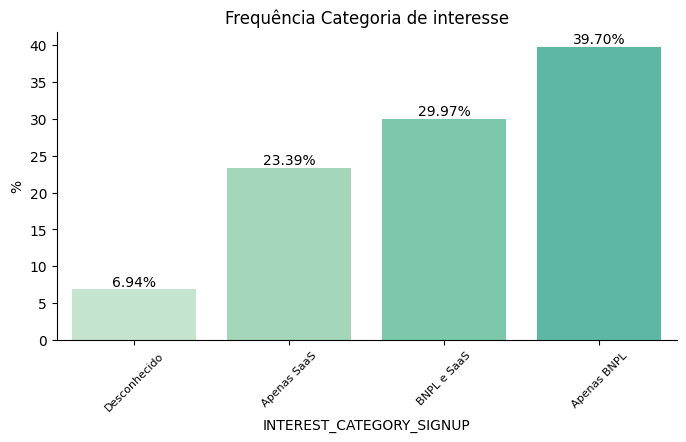

In [57]:
eda_clinics.plot_frequencia_cat(coluna='INTEREST_CATEGORY_SIGNUP', title='Frequência Categoria de interesse')

> Aqui também podemos confirmar o maior interesse das clínicas somente no serviço de BNPL (**Buy now, pay later**).

* Variável `MARKETING_ATTRIBUITION_CHANNEL_GROUP`: Grupo de canais de marketing utilizados para a aquisição do usuário.

In [58]:
df_clinics.rename(columns={'MARKETING_ATTRIBUITION_CHANNEL_GROUP':'MARKETING_ATTRIBUITION_CHANNEL_GROUP_ORIG'}, inplace=True)

In [59]:
df_clinics['MARKETING_ATTRIBUITION_CHANNEL_GROUP'] = np.where(df_clinics['MARKETING_ATTRIBUITION_CHANNEL_GROUP_ORIG'] == 'Other - known', 'Site ou Indicação Interna', df_clinics['MARKETING_ATTRIBUITION_CHANNEL_GROUP_ORIG'])

In [60]:
eda_clinics.frequencia_cat(coluna='MARKETING_ATTRIBUITION_CHANNEL_GROUP')

,MARKETING_ATTRIBUITION_CHANNEL_GROUP,frequencia,porcentagem
4,Site ou Indicação Interna,87,3.920685
3,Organic,99,4.461469
2,Other,548,24.695809
1,Paid - google,650,29.292474
0,Paid - meta,835,37.629563


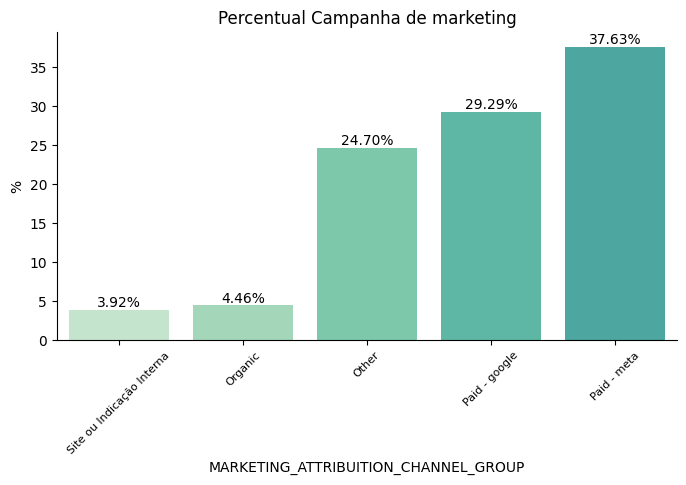

In [61]:
eda_clinics.plot_frequencia_cat(coluna='MARKETING_ATTRIBUITION_CHANNEL_GROUP', title='Percentual Campanha de marketing')

> As inicitativas de marketing relacionadas a canais pagos são responsáveis por mais de 60% do total das aquisições.

* Variável `IS_PAID_MEDIUM`: Indica se o meio pelo qual o usuário foi adquirido era pago.

In [62]:
eda_clinics.frequencia_cat(coluna='IS_PAID_MEDIUM')

,IS_PAID_MEDIUM,frequencia,porcentagem
1,False,734,33.077963
0,True,1485,66.922037


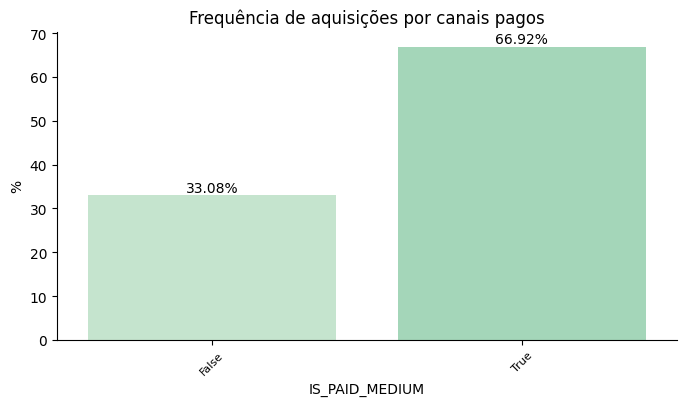

In [63]:
eda_clinics.plot_frequencia_cat(coluna='IS_PAID_MEDIUM', title='Frequência de aquisições por canais pagos')

> Aqui também podemos confirmar que os canais pagos utilizados para aquisição de clínicas são os pontos de destaque.

* Variável `TRIAL_DURATION`: Duração do periodo trial em dias.

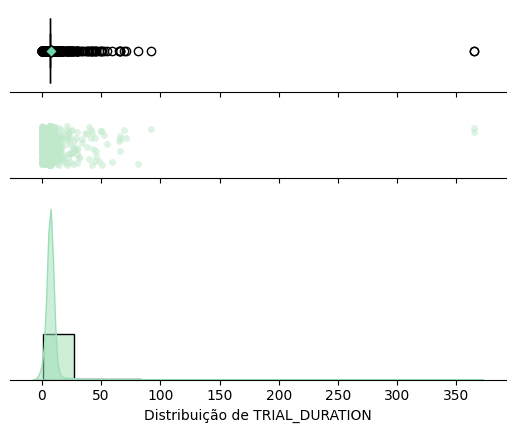

*************************** Resumo Estatístico **************************

A variável TRIAL_DURATION possui 2219 registros.

--- Medidas Tendencia Central -------------------------------------------


,Média,Mediana
TRIAL_DURATION,8.027,7.000


--- Medidas de Dispersão ------------------------------------------------


,dp,var,CV%,Skew,min,max,Alcance
TRIAL_DURATION,12.392,153.570,154.374,22.418,0.000,365.000,365.000


--- Medidas Separatrizes ------------------------------------------------


,25%,50%,75%,Limite inferior,Limite Superior
TRIAL_DURATION,7.0,7.0,7.0,7.0,7.0


In [64]:
eda_clinics.plot_distribuicao(coluna='TRIAL_DURATION')

> Cerca de 75% dos dados estão registrados com o período de testes (Trial) com até 7 dias.

> Distribuição assimétrica positiva, com alta dispersão dos dados -> coeficiente de variação(cv) = 146% e alcance de 365.

> Há indicios de presença de outliers, com períodos de testes muito acima de 7 dias.

* Variável `HAS_ASKED_FOR_ACCREDITATION`: Indica se a clínica pediu por credenciamento.

In [127]:
eda_clinics.frequencia_cat(coluna='HAS_ASKED_FOR_ACCREDITATION')

,HAS_ASKED_FOR_ACCREDITATION,frequencia,porcentagem
1,True,688,31.004957
0,False,1531,68.995043


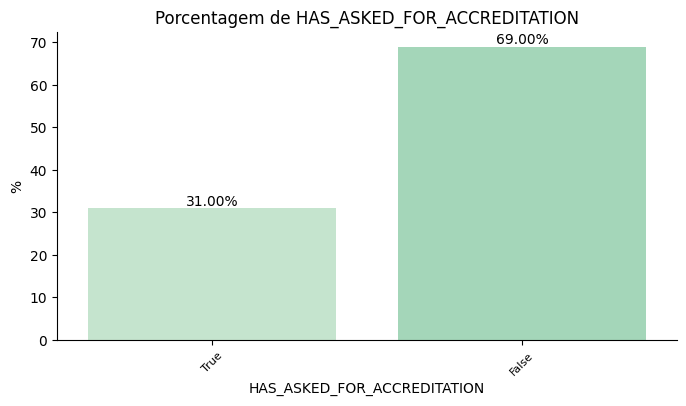

In [126]:
eda_clinics.plot_frequencia_cat(coluna='HAS_ASKED_FOR_ACCREDITATION')

> Grande parte das clínicas cadastradas (69%), não optaram pela opção de credenciamento.

* Variável `CLINIC_ACCREDITATION_STATUS`: Status de credenciamento da clinica.

In [65]:
eda_clinics.frequencia_cat(coluna='CLINIC_ACCREDITATION_STATUS')

,CLINIC_ACCREDITATION_STATUS,frequencia,porcentagem
5,Com pendência (fase 2),1,0.045065
4,Concluído - faltam dados bancários,15,0.675980
3,Reprovado,151,6.804867
2,Incompleta,270,12.167643
1,Concluído,521,23.479045
0,Não aderiu ao plano,1261,56.827400


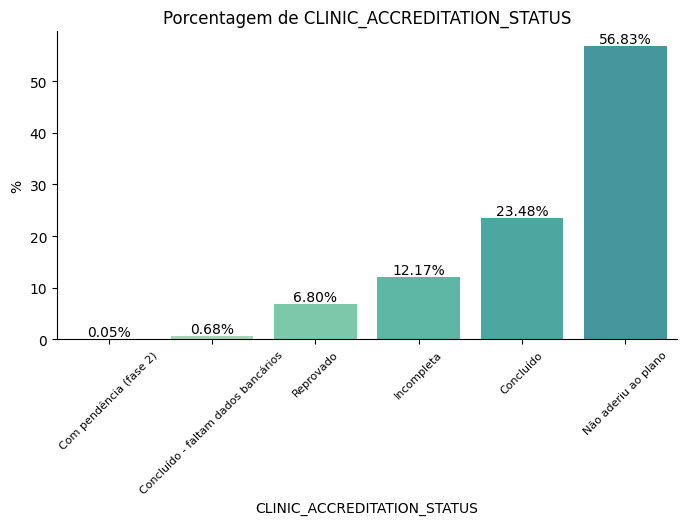

In [66]:
eda_clinics.plot_frequencia_cat(coluna='CLINIC_ACCREDITATION_STATUS')

> No início de nossa análise exploratória, vimos que essa variável apresentava um quantidade significativa de valores nulos, e portanto adotamos que eles representariam clínicas que não aderiram ao plano. Pelo gráfico, podemos observar que estes casos representam a maioria, com mais de 56% dos registros, seguidos pelo status de `Concluído`.

> Conclusões gerais sobre as variáveis relacionadas ao dataset `clinics`:
>> - O maior volume de cadastros de clínicas ocorre entre segunda e quarta-feira.
>> - A grande maioria das clínicas cadastradas são independentes.
>> - A fonte inicial de contato entre as clínicas e a Real, são realizadas através de da procura do clintes pela empresa (inbound).
>> - O maior interesse das clínicas pela aquisição, esta relacionada com o produto BNPL (Buy now, pay later).
>> - Marketing através de canais pagos são os que possuem os melhores desempenhos.
>> - A distribuição dos dados para o período de testes concentra a maior parte em até 7 dias, apresentando uma distribuição assimétrica positiva -> cv=146% e alcance de 365.
>> - Com relação ao pedido e status de credenciamento das clínicas, a maioria dos casos não aderiram ao plano.


> Outro ponto a ser destacado, é que algumas variáveis categóricas, possuem os dados desbalanceados entre suas categorias, sendo algumas com frequências muito baixas:
>> - Segmentação de negócio: Rede Homologada.
>> - Faz parte de uma rede ou franquia: True.
>> - Fontes de aquisição: eventos, outbound e no_user.
>> - Razões de interesse: Não informado.
>> - Canais de marketing: organic e site ou indicação interna.
>> - Status de credenciamento: Com pendência (fase 2) e Concluído - faltam dados bancários.

* #### Dataset Subscriptions

* Variáveis `SUBSCRIPTION_START_DATE`: Inicio da assinatura e `SUBSCRIPTION_END_DATE`: Termino da assinatura
    * Com elas iremos verificar o período de duração de assinatura das clínicas.

* Para os valores ausentes da variável `SUBSCRIPTION_END_DATE`, adotaremos a abordagem que até o período de fechamento da coleta dos dados, essas assinaturas estavam ativas, portanto serão consideradas como `Período em aberto`.

In [67]:
df_subscriptions['SUBSCRIPTION_PERIOD_DAYS'] = np.where((df_subscriptions['SUBSCRIPTION_END_DATE'] - df_subscriptions['SUBSCRIPTION_START_DATE']).dt.days.isna(), 999
                , (df_subscriptions['SUBSCRIPTION_END_DATE'] - df_subscriptions['SUBSCRIPTION_START_DATE']).dt.days)

In [68]:
df_subscriptions['SUBSCRIPTION_PERIOD'] = pd.cut(np.where((df_subscriptions['SUBSCRIPTION_END_DATE'] - df_subscriptions['SUBSCRIPTION_START_DATE']).dt.days.isna(), 999
                , (df_subscriptions['SUBSCRIPTION_END_DATE'] - df_subscriptions['SUBSCRIPTION_START_DATE']).dt.days)
       , bins=[0,30,60,90,120,366,999]
       , labels=['Até 30 dias', 'Entre 31 e 60 dias', 'Entre 61 e 90 dias', 'Entre 91 e 120 dias', 'Acima de 120 dias', 'Período em aberto'])

In [69]:
eda_subscriptions.frequencia_cat(coluna='SUBSCRIPTION_PERIOD')

,SUBSCRIPTION_PERIOD,frequencia,porcentagem
5,Entre 91 e 120 dias,1,0.260417
4,Acima de 120 dias,2,0.520833
3,Entre 61 e 90 dias,12,3.125000
2,Até 30 dias,13,3.385417
1,Entre 31 e 60 dias,18,4.687500
0,Período em aberto,338,88.020833


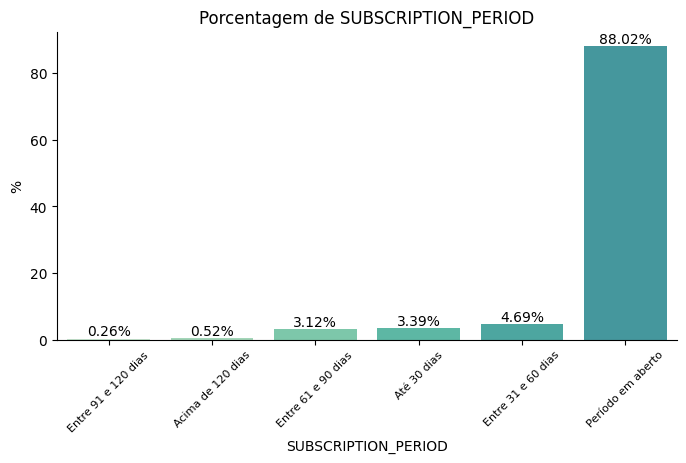

In [70]:
eda_subscriptions.plot_frequencia_cat(coluna='SUBSCRIPTION_PERIOD')

> A grande maioria das assinaturas, 88% do total, estavam até o fechamento do período da coleta de dados, com o período final da assinatura em aberto, ou seja, a variável `SUBSCRIPTION_END_DATE` estava com seu valor ausente (NaN).

* Variável `SUBSCRIPTION_STATUS`: Status atual da assinatura.

In [71]:
eda_subscriptions.frequencia_cat(coluna='SUBSCRIPTION_STATUS')

,SUBSCRIPTION_STATUS,frequencia,porcentagem
2,past_due,9,2.343750
1,canceled,32,8.333333
0,active,341,88.802083


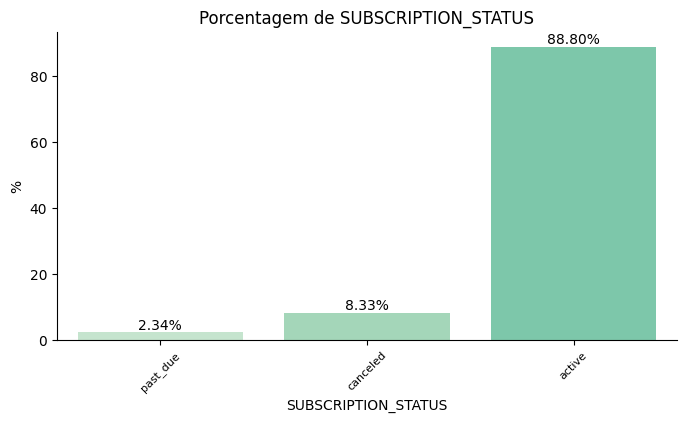

In [72]:
eda_subscriptions.plot_frequencia_cat(coluna='SUBSCRIPTION_STATUS')

* A grande maioria das assinaturas, cerca de 88%, estão com o status ativo.

* Variável `BILLING_INTERVAL_IN_MONTHS`: Intervalo em meses da frequência dos pagamentos

In [73]:
eda_subscriptions.frequencia_cat(coluna='BILLING_INTERVAL_IN_MONTHS')

,BILLING_INTERVAL_IN_MONTHS,frequencia,porcentagem
2,6.000000,56,14.583333
1,12.000000,71,18.489583
0,1.000000,257,66.927083


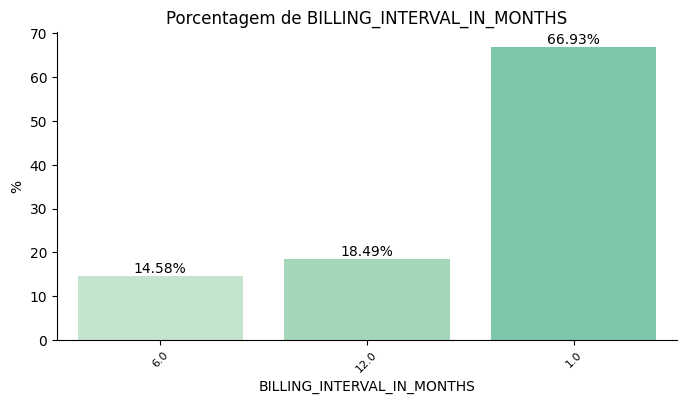

In [74]:
eda_subscriptions.plot_frequencia_cat(coluna='BILLING_INTERVAL_IN_MONTHS')

* Mais de 66% das clínicas cadastradas, optam pelo pagamento mensal.

> Conclusões gerais sobre as variáveis relacionadas ao dataset `subscriptions`:
>> - A maioria das assinaturas estão com seu período de encerramento em aberto, portanto consideradas ativas.
>> - Assinaturas com períodos superiores a 90 dias, tem frequências muito baixas.
>> - Através do status da assinatura, pudemos confirmar a maioria ativa.
>> - O pagamento mensal é o mais adotado.

* #### Dataset Activity

* Variável `ACTIVITY_TYPE`: Tipo da atividade

In [75]:
eda_activity.frequencia_cat(coluna='ACTIVITY_TYPE')

,ACTIVITY_TYPE,frequencia,porcentagem
25,payment_book_created,3,0.021519
24,anamnesis_template_discarded,9,0.064558
23,observation_discarded,10,0.071731
22,complete_credit_check,19,0.136289
21,contract,20,0.143462
20,time_slot_attendance_update,22,0.157808
19,anamnesis_template_created,28,0.200846
18,prescription_created,35,0.251058
17,basic_credit_check,38,0.272577
16,document_created,77,0.552328


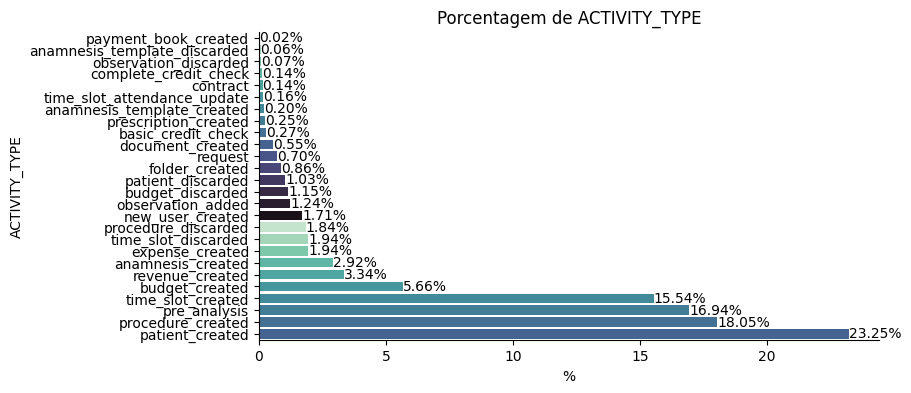

In [76]:
eda_activity.plot_frequencia_cat(coluna='ACTIVITY_TYPE', orient='h')

> O gráfico nos mostra que as atividades relacionadas ao controle de pacientes, procedimentos, horários e orçamentos são as mais utilizadas, com um percentual de aproximadamente 73%.

* Variável `FEATURE`: Funcionalidade do sistema onde a atividade esta relacionada.

In [77]:
eda_activity.frequencia_cat(coluna='FEATURE')

,FEATURE,frequencia,porcentagem
10,payment_book,3,0.021519
9,credit_check,57,0.408866
8,documents_and_files,232,1.664156
7,user_management,238,1.707195
6,anamnese,444,3.184850
5,revenue_management,737,5.286565
4,budget_management,949,6.807259
3,scheduling,2460,17.645793
2,bnpl,2480,17.789255
1,medical_record,2773,19.890969


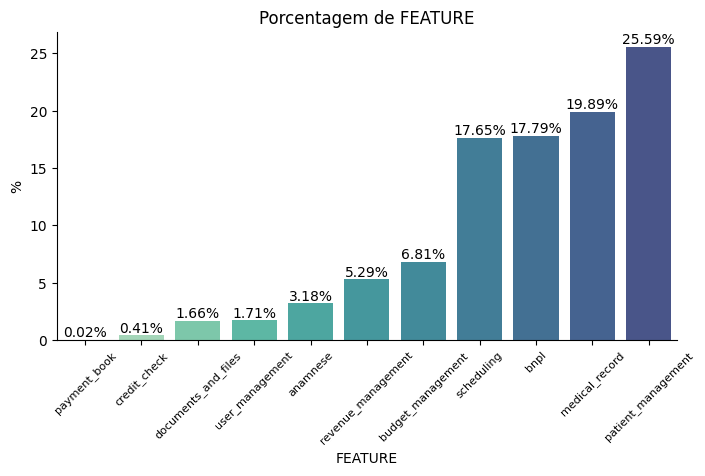

In [78]:
eda_activity.plot_frequencia_cat(coluna='FEATURE')

> As funcionalidades principais foram `patient_management`, `medical_record`, `bnpl`, e `scheduling`. Como visto no gráfico anterior, atividades relacionadas ao gerenciamento dos pacientes, são as mais utilizadas.

* Variável `MODULE`: Módulo do sistema ou parte do produto em que a atividade ocorreu.

In [79]:
eda_activity.frequencia_cat(coluna='MODULE')

,MODULE,frequencia,porcentagem
3,setup,238,1.707195
2,schedule,2460,17.645793
1,finance,3277,23.506205
0,patient,7966,57.140808


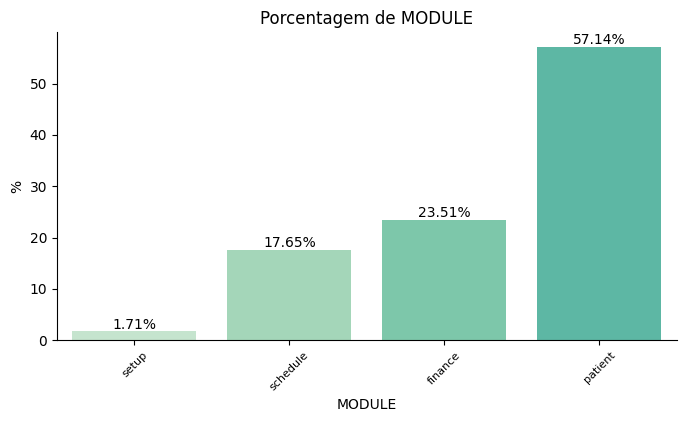

In [80]:
eda_activity.plot_frequencia_cat(coluna='MODULE')

> Novamente as atividades relacionadas com o gerenciamento são o destaque, com o percentual de 57%.

* Variável `IS_VALID_ACTIVITY`: É uma atividade valida?

In [81]:
eda_activity.frequencia_cat(coluna='IS_VALID_ACTIVITY')

,IS_VALID_ACTIVITY,frequencia,porcentagem
1,False,5701,40.893767
0,True,8240,59.106233


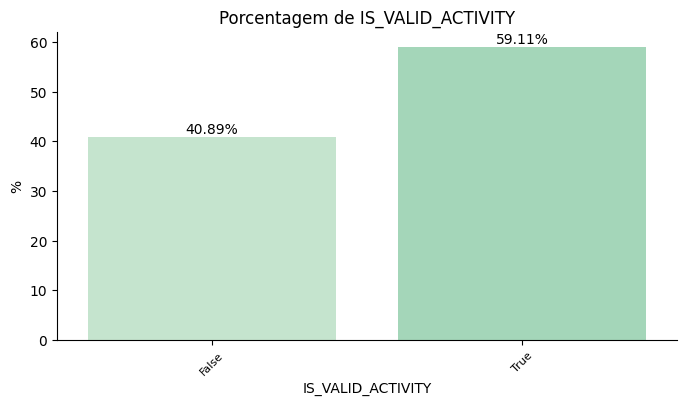

In [82]:
eda_activity.plot_frequencia_cat(coluna='IS_VALID_ACTIVITY')

> O número de atividades válidas durante o périodo de testes (Trial) é maior, porém notasse um percentual alto de atividades inválidas.

> Conclusões gerais sobre as variáveis relacionadas ao dataset `activity`:
>> - Os tipos de atividades mais utilizadas durante o período de testes estão relacionadas ao controle de pacientes, procedimentos, horários e orçamentos.
>> - A divisão entre atividades válidas e inválidas estão bem próximas.


In [83]:
# Exportando os datasets com os tratamentos de dados

df_clinics.to_csv(r'..\dados\df_clinics_cleaned.csv', index=False)
df_subscriptions.to_csv(r'..\dados\df_subscriptions_cleaned.csv', index=False)
df_activity.to_csv(r'..\dados\df_activity_cleaned.csv', index=False)

* #### Próximos passos

* Vamos realizar a união dos datasets : `df_clinics`, `df_subscriptions` e `df_activity`.
* Retirar do dataset as clínicas que são grandes redes e franquias, diferenciadas das outras por colunas como `business_segmentation` e `is_chain_clinic`.

In [92]:
# Variáveis de interesse Clinics
var_clinics = ['CLINIC_ID', 'CLINIC_CREATED_AT', 'IS_CHAIN_CLINIC','FIRST_USER_HUBSPOT_SOURCE','INTEREST_CATEGORY_SIGNUP','TRIAL_DURATION',
               'TRIAL_START_DATE', 'TRIAL_END_DATE','MARKETING_ATTRIBUITION_CHANNEL_GROUP', 'IS_PAID_MEDIUM', 'HAS_ASKED_FOR_ACCREDITATION',
                 'IS_ACCREDITATION_APPROVED', 'IS_ACCREDITATION_REPROVED', 'CLINIC_ACCREDITATION_STATUS'] 

In [190]:
df_clinics[var_clinics].head()


,CLINIC_ID,CLINIC_CREATED_AT,IS_CHAIN_CLINIC,FIRST_USER_HUBSPOT_SOURCE,INTEREST_CATEGORY_SIGNUP,TRIAL_DURATION,TRIAL_START_DATE,TRIAL_END_DATE,MARKETING_ATTRIBUITION_CHANNEL_GROUP,IS_PAID_MEDIUM,HAS_ASKED_FOR_ACCREDITATION,IS_ACCREDITATION_APPROVED,IS_ACCREDITATION_REPROVED,CLINIC_ACCREDITATION_STATUS
0,8993,2023-08-01 06:25:16.121,False,Inbound,BNPL e SaaS,7,2023-08-01,2023-08-08,Paid - meta,True,False,False,False,Não aderiu ao plano
1,8994,2023-08-01 06:58:36.251,False,Inbound,BNPL e SaaS,7,2023-08-01,2023-08-08,Paid - meta,True,False,False,False,Não aderiu ao plano
2,8995,2023-08-01 06:59:23.156,False,Inbound,Apenas BNPL,7,2023-08-01,2023-08-08,Paid - meta,True,False,False,False,Não aderiu ao plano
3,8996,2023-08-01 08:03:38.557,False,Inbound,BNPL e SaaS,7,2023-08-01,2023-08-08,Paid - meta,True,False,False,False,Não aderiu ao plano
4,8997,2023-08-01 08:34:33.894,False,Inbound,Apenas SaaS,7,2023-08-01,2023-08-08,Paid - meta,True,False,False,False,Não aderiu ao plano


In [191]:
var_subscriptions = ['CLINIC_ID', 'STRIPE_SUBSCRIPTION_ID', 'SUBSCRIPTION_START_DATE','SUBSCRIPTION_END_DATE', 'SUBSCRIPTION_PERIOD_DAYS', 'SUBSCRIPTION_PERIOD'
                     ,'SUBSCRIPTION_STATUS','BILLING_INTERVAL_IN_MONTHS']

In [192]:
df_subscriptions[var_subscriptions].head()

,CLINIC_ID,STRIPE_SUBSCRIPTION_ID,SUBSCRIPTION_START_DATE,SUBSCRIPTION_END_DATE,SUBSCRIPTION_PERIOD_DAYS,SUBSCRIPTION_PERIOD,SUBSCRIPTION_STATUS,BILLING_INTERVAL_IN_MONTHS
0,9000,sub_1NaOxzCpjOdJI4gTfqZ2epGB,2023-08-01,2023-10-01,61.0,Entre 61 e 90 dias,canceled,1.0
1,9032,sub_1Namy7CpjOdJI4gTzrxPLlFg,2023-08-02,NaT,999.0,Período em aberto,past_due,1.0
2,9105,sub_1NalRdCpjOdJI4gTFRPqMhcv,2023-08-02,NaT,999.0,Período em aberto,active,1.0
3,9027,sub_1Nb3CECpjOdJI4gTFLOepcZD,2023-08-03,2023-09-03,31.0,Entre 31 e 60 dias,canceled,1.0
4,9072,sub_1Nb7E2CpjOdJI4gTsIJIy9b1,2023-08-03,2023-09-03,31.0,Entre 31 e 60 dias,canceled,1.0


In [193]:
var_activity = ['CLINIC_ID', 'ACTIVITY_AT', 'ACTIVITY_TYPE', 'FEATURE', 'MODULE','IS_VALID_ACTIVITY']

In [194]:
df_activity[var_activity].head()

,CLINIC_ID,ACTIVITY_AT,ACTIVITY_TYPE,FEATURE,MODULE,IS_VALID_ACTIVITY
0,9825,2023-08-24 18:46:47.733,patient_discarded,patient_management,patient,True
1,9984,2023-08-24 19:41:43.497,patient_created,patient_management,patient,False
2,9984,2023-08-24 19:41:44.037,time_slot_created,scheduling,schedule,True
3,9984,2023-08-24 19:51:20.451,patient_created,patient_management,patient,False
4,9984,2023-08-24 19:51:46.663,time_slot_created,scheduling,schedule,True


In [225]:
# Exportando os datasets com somente as colunas necessárias para a realização dos KPIs.

df_clinics[var_clinics].to_csv(r'..\dados\df_clinics_kpi.csv', index=False)
df_subscriptions[var_subscriptions].to_csv(r'..\dados\df_subscriptions_kpi.csv', index=False)
df_activity[var_activity].to_csv(r'..\dados\df_activity_kpi.csv', index=False)

Vamos unir os 3 datasets para realizarmos nossa análise exploratória.

In [195]:
df_clinics[var_clinics].shape

(2219, 14)

In [99]:
df_activity[var_activity].shape

(13941, 6)

In [100]:
df_subscriptions[var_subscriptions].shape

(384, 8)

In [196]:
# Vamos unir os datasets df_clinicas_independentes e df_activity
df_merge_1 = pd.merge(df_activity[var_activity], df_clinics[var_clinics], on='CLINIC_ID', how='left')

In [201]:
df_merge_1.head()

,CLINIC_ID,ACTIVITY_AT,ACTIVITY_TYPE,FEATURE,MODULE,IS_VALID_ACTIVITY,CLINIC_CREATED_AT,IS_CHAIN_CLINIC,FIRST_USER_HUBSPOT_SOURCE,INTEREST_CATEGORY_SIGNUP,TRIAL_DURATION,TRIAL_START_DATE,TRIAL_END_DATE,MARKETING_ATTRIBUITION_CHANNEL_GROUP,IS_PAID_MEDIUM,HAS_ASKED_FOR_ACCREDITATION,IS_ACCREDITATION_APPROVED,IS_ACCREDITATION_REPROVED,CLINIC_ACCREDITATION_STATUS
0,9825,2023-08-24 18:46:47.733,patient_discarded,patient_management,patient,True,2023-08-21 09:14:34.763,False,Inbound,Apenas BNPL,4,2023-08-21,2023-08-25,Paid - meta,True,True,True,False,Concluído
1,9984,2023-08-24 19:41:43.497,patient_created,patient_management,patient,False,2023-08-24 19:40:58.432,False,Inbound,BNPL e SaaS,7,2023-08-24,2023-08-31,Paid - google,True,True,True,False,Concluído
2,9984,2023-08-24 19:41:44.037,time_slot_created,scheduling,schedule,True,2023-08-24 19:40:58.432,False,Inbound,BNPL e SaaS,7,2023-08-24,2023-08-31,Paid - google,True,True,True,False,Concluído
3,9984,2023-08-24 19:51:20.451,patient_created,patient_management,patient,False,2023-08-24 19:40:58.432,False,Inbound,BNPL e SaaS,7,2023-08-24,2023-08-31,Paid - google,True,True,True,False,Concluído
4,9984,2023-08-24 19:51:46.663,time_slot_created,scheduling,schedule,True,2023-08-24 19:40:58.432,False,Inbound,BNPL e SaaS,7,2023-08-24,2023-08-31,Paid - google,True,True,True,False,Concluído


In [202]:
df_merge_1.shape

(13941, 19)

In [203]:
# Vamos unir os datasets df_merge_1 e df_subscriptions
df_merge_2 = pd.merge(df_merge_1, df_subscriptions[var_subscriptions], how='left', on='CLINIC_ID')
df_merge_2.head()

,CLINIC_ID,ACTIVITY_AT,ACTIVITY_TYPE,FEATURE,MODULE,IS_VALID_ACTIVITY,CLINIC_CREATED_AT,IS_CHAIN_CLINIC,FIRST_USER_HUBSPOT_SOURCE,INTEREST_CATEGORY_SIGNUP,TRIAL_DURATION,TRIAL_START_DATE,TRIAL_END_DATE,MARKETING_ATTRIBUITION_CHANNEL_GROUP,IS_PAID_MEDIUM,HAS_ASKED_FOR_ACCREDITATION,IS_ACCREDITATION_APPROVED,IS_ACCREDITATION_REPROVED,CLINIC_ACCREDITATION_STATUS,STRIPE_SUBSCRIPTION_ID,SUBSCRIPTION_START_DATE,SUBSCRIPTION_END_DATE,SUBSCRIPTION_PERIOD_DAYS,SUBSCRIPTION_PERIOD,SUBSCRIPTION_STATUS,BILLING_INTERVAL_IN_MONTHS
0,9825,2023-08-24 18:46:47.733,patient_discarded,patient_management,patient,True,2023-08-21 09:14:34.763,False,Inbound,Apenas BNPL,4,2023-08-21,2023-08-25,Paid - meta,True,True,True,False,Concluído,sub_1Nj29VCpjOdJI4gTsWNO1Kzm,2023-08-25,2023-10-25,61.0,Entre 61 e 90 dias,active,1.0
1,9984,2023-08-24 19:41:43.497,patient_created,patient_management,patient,False,2023-08-24 19:40:58.432,False,Inbound,BNPL e SaaS,7,2023-08-24,2023-08-31,Paid - google,True,True,True,False,Concluído,NaN,NaT,NaT,NaN,NaN,NaN,NaN
2,9984,2023-08-24 19:41:44.037,time_slot_created,scheduling,schedule,True,2023-08-24 19:40:58.432,False,Inbound,BNPL e SaaS,7,2023-08-24,2023-08-31,Paid - google,True,True,True,False,Concluído,NaN,NaT,NaT,NaN,NaN,NaN,NaN
3,9984,2023-08-24 19:51:20.451,patient_created,patient_management,patient,False,2023-08-24 19:40:58.432,False,Inbound,BNPL e SaaS,7,2023-08-24,2023-08-31,Paid - google,True,True,True,False,Concluído,NaN,NaT,NaT,NaN,NaN,NaN,NaN
4,9984,2023-08-24 19:51:46.663,time_slot_created,scheduling,schedule,True,2023-08-24 19:40:58.432,False,Inbound,BNPL e SaaS,7,2023-08-24,2023-08-31,Paid - google,True,True,True,False,Concluído,NaN,NaT,NaT,NaN,NaN,NaN,NaN


In [204]:
df_merge_2.shape

(13941, 26)

Agora iremos filtrar o dataset clinics, retirando os registros das clínicas que pertencem a grandes redes e franquias de clínicas odontológicas pelo Brasil, identificadas pelas colunas `BUSINESS_SEGMENTATION <> Independente` e `IS_CHAIN_CLINIC = True`.

In [207]:
# Criando um dataset somente com clinicas independentes.
df_merge_2 = df_merge_2.loc[~df_merge_2['IS_CHAIN_CLINIC']]
df_merge_2.shape

(12421, 26)

In [208]:
# Exportando os dados para um arquivo .csv
df_merge_2.to_csv(r'..\dados\aquisicao_clinicas_completo.csv', index=False)

In [212]:
# Lendo os dados de um arquivo .csv
df_real = pd.read_csv(r'..\dados\aquisicao_clinicas_completo.csv',
                       parse_dates=['ACTIVITY_AT','CLINIC_CREATED_AT','TRIAL_START_DATE','TRIAL_END_DATE','SUBSCRIPTION_START_DATE','SUBSCRIPTION_END_DATE'])
df_real.head()

,CLINIC_ID,ACTIVITY_AT,ACTIVITY_TYPE,FEATURE,MODULE,IS_VALID_ACTIVITY,CLINIC_CREATED_AT,IS_CHAIN_CLINIC,FIRST_USER_HUBSPOT_SOURCE,INTEREST_CATEGORY_SIGNUP,TRIAL_DURATION,TRIAL_START_DATE,TRIAL_END_DATE,MARKETING_ATTRIBUITION_CHANNEL_GROUP,IS_PAID_MEDIUM,HAS_ASKED_FOR_ACCREDITATION,IS_ACCREDITATION_APPROVED,IS_ACCREDITATION_REPROVED,CLINIC_ACCREDITATION_STATUS,STRIPE_SUBSCRIPTION_ID,SUBSCRIPTION_START_DATE,SUBSCRIPTION_END_DATE,SUBSCRIPTION_PERIOD_DAYS,SUBSCRIPTION_PERIOD,SUBSCRIPTION_STATUS,BILLING_INTERVAL_IN_MONTHS
0,9825,2023-08-24 18:46:47.733,patient_discarded,patient_management,patient,True,2023-08-21 09:14:34.763,False,Inbound,Apenas BNPL,4,2023-08-21,2023-08-25,Paid - meta,True,True,True,False,Concluído,sub_1Nj29VCpjOdJI4gTsWNO1Kzm,2023-08-25,2023-10-25,61.0,Entre 61 e 90 dias,active,1.0
1,9984,2023-08-24 19:41:43.497,patient_created,patient_management,patient,False,2023-08-24 19:40:58.432,False,Inbound,BNPL e SaaS,7,2023-08-24,2023-08-31,Paid - google,True,True,True,False,Concluído,NaN,NaT,NaT,NaN,NaN,NaN,NaN
2,9984,2023-08-24 19:41:44.037,time_slot_created,scheduling,schedule,True,2023-08-24 19:40:58.432,False,Inbound,BNPL e SaaS,7,2023-08-24,2023-08-31,Paid - google,True,True,True,False,Concluído,NaN,NaT,NaT,NaN,NaN,NaN,NaN
3,9984,2023-08-24 19:51:20.451,patient_created,patient_management,patient,False,2023-08-24 19:40:58.432,False,Inbound,BNPL e SaaS,7,2023-08-24,2023-08-31,Paid - google,True,True,True,False,Concluído,NaN,NaT,NaT,NaN,NaN,NaN,NaN
4,9984,2023-08-24 19:51:46.663,time_slot_created,scheduling,schedule,True,2023-08-24 19:40:58.432,False,Inbound,BNPL e SaaS,7,2023-08-24,2023-08-31,Paid - google,True,True,True,False,Concluído,NaN,NaT,NaT,NaN,NaN,NaN,NaN


In [213]:
df_real.shape

(12421, 26)